## Script to plot results of heterochromatin localization study

In [29]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [25]:
# specify directory to analyze
myDirMain=r"S:\CookLab\Liu\20190816_organizedData_MCM_loading\DATA"
myDirList=["20190506-MSL decon rename","20190607-MSL decon rename","20190609-MSL decon rename",
           "20190625-MSL decon rename","20190701-MSL decon rename","20190712-MSL decon rename",
           "20190716-MSL decon rename"]
# define a file with all the info
myFileData=r'S:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells.csv'

In [27]:
# read in the main data file
myDataTracking=pd.read_csv(myFileData)
print(len(myDataTracking))
myDataTracking.head()

280


,Unnamed: 0,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,imaging core,cell id for tracking,comment,dhb_tracking,exp,track_cell_id,dist,x_track,y_track,track_length
0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172.0,956.0,HP1B,1.0,MCM3,...,HIC,0.0,NaN,1.906192e+10,19061916009,0.0,3.807887,173.5,959.5,5.0
1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158.0,906.0,HP1B,1.0,MCM3,...,HIC,1.0,NaN,1.906192e+10,19061916009,1.0,4.272002,159.5,902.0,5.0
2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832.0,252.0,HP1B,1.0,MCM3,...,HIC,2.0,NaN,1.906192e+10,19061916009,2.0,6.000000,826.0,252.0,13.0
3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888.0,160.0,HP1B,1.0,MCM3,...,HIC,3.0,NaN,1.906192e+10,19061916009,3.0,1.500000,889.5,160.0,13.0
4,5,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172.0,324.0,HP1B,1.0,MCM3,...,HIC,5.0,130 min after s,1.906192e+10,19061916009,5.0,3.354102,175.0,322.5,118.0


In [30]:
pathsList=[os.path.join(myDirMain,x,'results') for x in myDirList]
pathsList

['S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190506-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190607-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190609-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190625-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190701-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190712-MSL decon rename\\results',
 'S:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\DATA\\20190716-MSL decon rename\\results']

Read all the data - original csv files contain measurements for each frame.

In [43]:
myData=pd.DataFrame()

for myDir in pathsList:

    myFiles = [f for f in listdir(myDir) if ('nucleusSignal' in f)]
    print(len(myFiles))

    for f in myFiles:

        myData_temp=pd.read_csv(join(myDir, f))
        myData_temp['file']=f
        myData_temp['total']=myData_temp.Area*myData_temp.Mean;
        myData_temp['localization']='nucleus'

        try:
            myData = pd.concat([myData,myData_temp],sort=False)
        except:
            myData = myData_temp.copy()

        # add euchromatin
        myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "euChrom")))
        myData_temp['file']=f
        myData_temp['total']=myData_temp.Area*myData_temp.Mean;
        myData_temp['localization']='eu'

        myData = pd.concat([myData,myData_temp],sort=False)

        # add heterochromatin
        myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "hetChrom")))
        myData_temp['file']=f
        myData_temp['total']=myData_temp.Area*myData_temp.Mean;
        myData_temp['localization']='het'

        myData = pd.concat([myData,myData_temp],sort=False)
    

17
30
16
28
31
31
17


In [44]:
print(len(myData))
myData.head()

14204


,Area,Mean,StdDev,Mode,Slice,file,total,localization
0,8206,78.088,24.206,67.660,3,20190506_cellde-11.czi_nucleusSignal.csv,640790.128,nucleus
1,25875,91.764,28.074,84.153,4,20190506_cellde-11.czi_nucleusSignal.csv,2374393.500,nucleus
2,27753,115.119,37.546,91.601,5,20190506_cellde-11.czi_nucleusSignal.csv,3194897.607,nucleus
3,29094,152.609,57.771,140.143,6,20190506_cellde-11.czi_nucleusSignal.csv,4440006.246,nucleus
4,29942,202.539,89.378,173.634,7,20190506_cellde-11.czi_nucleusSignal.csv,6064422.738,nucleus


Summarize data for each cell and then calculate ratios.

In [45]:
myData_cells=myData.groupby(['file','localization'], as_index=False).sum()

In [46]:
print(len(myData_cells))
myData_cells.head()

510


,file,localization,Area,Mean,StdDev,Mode,Slice,total
0,20190506_cellde-01.czi_nucleusSignal.csv,eu,554048,5042.030,2509.466,4108.760,675,1.017983e+08
1,20190506_cellde-01.czi_nucleusSignal.csv,het,9928,4682.191,1594.459,3828.503,506,2.090623e+06
2,20190506_cellde-01.czi_nucleusSignal.csv,nucleus,563976,5047.318,2499.840,4113.269,675,1.038889e+08
3,20190506_cellde-02.czi_nucleusSignal.csv,eu,533942,3394.558,1719.187,2555.893,675,6.523825e+07
4,20190506_cellde-02.czi_nucleusSignal.csv,het,3938,3086.519,1079.472,2464.579,462,6.038584e+05


In [47]:
def group_norm(group):
    # find norm factors/group
    area_norm_factor=np.array(group.loc[group.localization=='nucleus','Area'])[0]
    signal_norm_factor=np.array(group.loc[group.localization=='nucleus','total'])[0]
    #modify dataframe
    group['volume_norm']=group.Area/area_norm_factor
    group['signal_norm']=group.total/signal_norm_factor
    return group

In [51]:
myData_conf=myData_cells.groupby(['file'],as_index=False).apply(group_norm)

In [57]:
print(len(myData_conf))
myData_conf.head()

510


,file,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm,orgFile
0,20190506_cellde-01.czi_nucleusSignal.csv,eu,554048,5042.030,2509.466,4108.760,675,1.017983e+08,0.982396,0.979876,20190506_cellde-01.czi
1,20190506_cellde-01.czi_nucleusSignal.csv,het,9928,4682.191,1594.459,3828.503,506,2.090623e+06,0.017604,0.020124,20190506_cellde-01.czi
2,20190506_cellde-01.czi_nucleusSignal.csv,nucleus,563976,5047.318,2499.840,4113.269,675,1.038889e+08,1.000000,1.000000,20190506_cellde-01.czi
3,20190506_cellde-02.czi_nucleusSignal.csv,eu,533942,3394.558,1719.187,2555.893,675,6.523825e+07,0.992679,0.990828,20190506_cellde-02.czi
4,20190506_cellde-02.czi_nucleusSignal.csv,het,3938,3086.519,1079.472,2464.579,462,6.038584e+05,0.007321,0.009171,20190506_cellde-02.czi


In [50]:
510/3

170.0

In [60]:
# merge data frames
myData_conf['orgFile']=[f'{x[:-18]}.ims' for x in myData_conf.file]
dataMerged=pd.merge(myDataTracking,myData_conf,left_on='file',right_on='orgFile')

In [62]:
print(len(dataMerged))
dataMerged.head()

375


,Unnamed: 0,file_x,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm,orgFile
0,38,20190625_cellde-00.czi.ims,10_7LE1(B),0,190619-cdc6-dhb-pcna002xy09,172.0,956.0,HP1B,1.0,MCM3,...,eu,694950,74053.932,37917.029,54307.345,893,1.576061e+09,0.990352,0.982410,20190625_cellde-00.czi.ims
1,38,20190625_cellde-00.czi.ims,10_7LE1(B),0,190619-cdc6-dhb-pcna002xy09,172.0,956.0,HP1B,1.0,MCM3,...,het,6770,71760.045,23390.747,61642.250,459,2.821993e+07,0.009648,0.017590,20190625_cellde-00.czi.ims
2,38,20190625_cellde-00.czi.ims,10_7LE1(B),0,190619-cdc6-dhb-pcna002xy09,172.0,956.0,HP1B,1.0,MCM3,...,nucleus,701720,74269.778,37856.180,54545.051,893,1.604280e+09,1.000000,1.000000,20190625_cellde-00.czi.ims
3,39,20190625_cellde-01.czi.ims,10_7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158.0,906.0,HP1B,1.0,MCM3,...,eu,649489,77893.928,45591.068,58442.251,888,1.521750e+09,0.992260,0.987037,20190625_cellde-01.czi.ims
4,39,20190625_cellde-01.czi.ims,10_7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158.0,906.0,HP1B,1.0,MCM3,...,het,5066,75660.414,22221.724,62708.303,475,1.998535e+07,0.007740,0.012963,20190625_cellde-01.czi.ims


### Plots

Volume of heterochromatin vs euchromatin.

Text(0.5, 1.0, 'early G1')

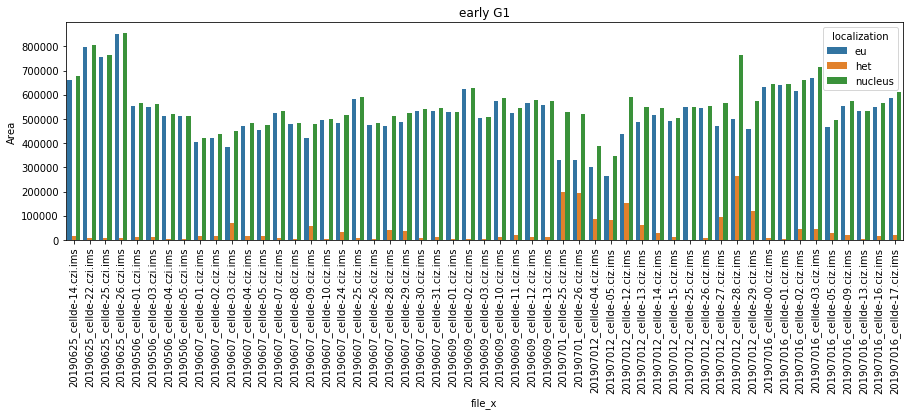

In [67]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="Area", hue="localization", data=dataMerged.loc[dataMerged.category=='early G1'])
plt.xticks(rotation='vertical')
plt.title('early G1')

Text(0.5, 1.0, 'middle G1')

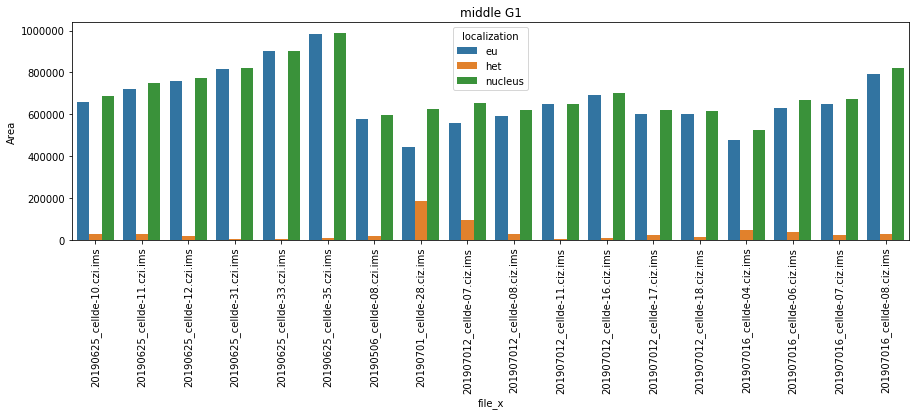

In [82]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="Area", hue="localization", data=dataMerged.loc[dataMerged.category=='middle G1'])
plt.xticks(rotation='vertical')
plt.title('middle G1')

Text(0.5, 1.0, 'late G1')

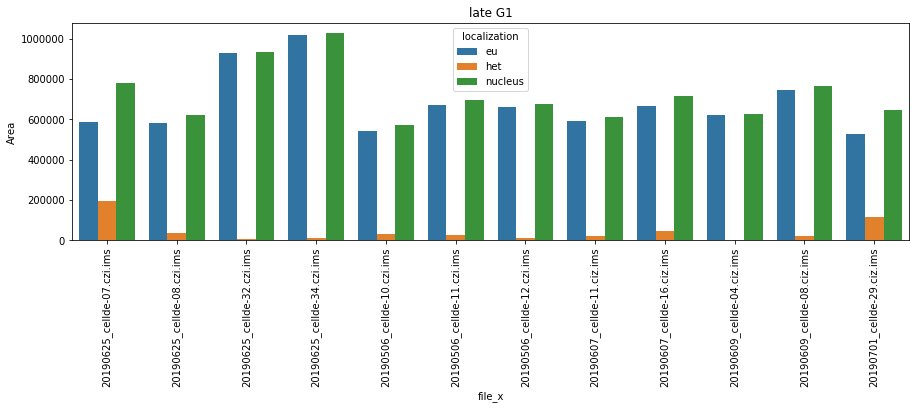

In [79]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="Area", hue="localization", data=dataMerged.loc[dataMerged.category=='late G1'])
plt.xticks(rotation='vertical')
plt.title('late G1')

Text(0.5, 1.0, 'G2')

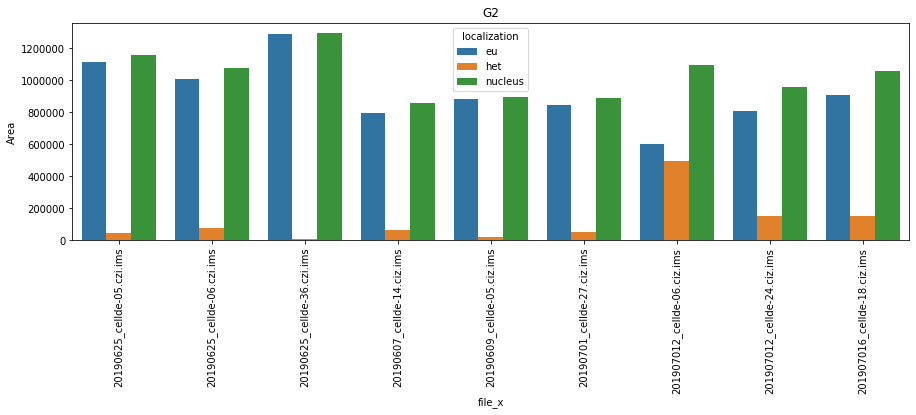

In [71]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="Area", hue="localization", data=dataMerged.loc[dataMerged.category=='G2'])
plt.xticks(rotation='vertical')
plt.title('G2')

Plot ratios in different chromatin structures.

Text(0.5, 1.0, 'early G1 MCM')

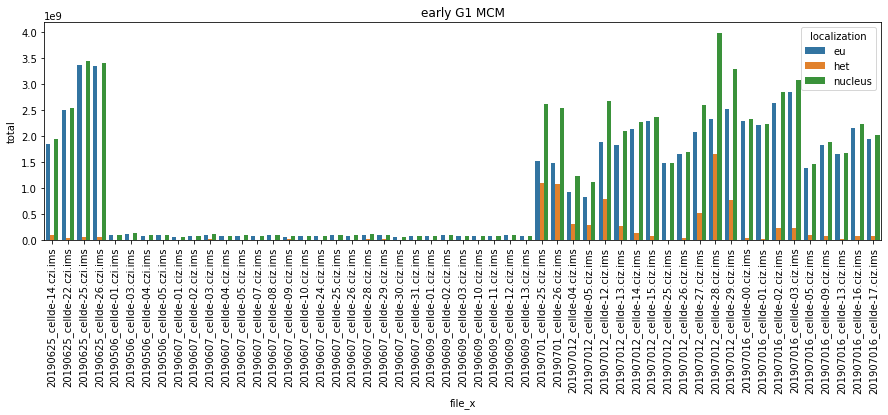

In [75]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="total", hue="localization", data=dataMerged.loc[dataMerged.category=='early G1'])
plt.xticks(rotation='vertical')
plt.title('early G1 MCM')

Text(0.5, 1.0, 'middle G1 MCM')

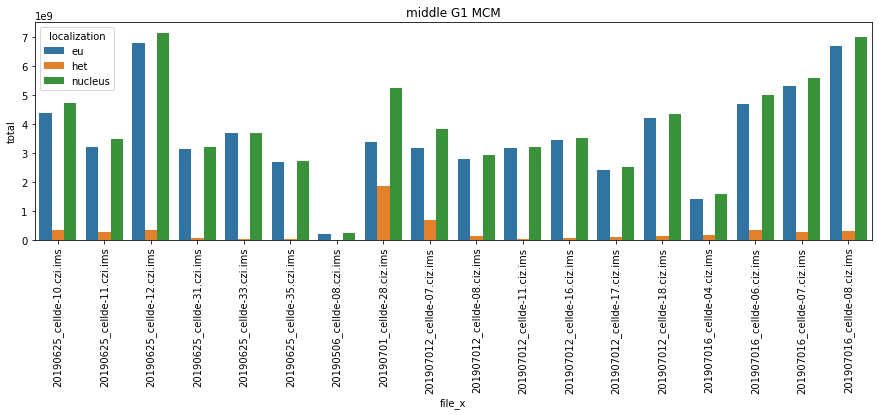

In [77]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="total", hue="localization", data=dataMerged.loc[dataMerged.category=='middle G1'])
plt.xticks(rotation='vertical')
plt.title('middle G1 MCM')

Text(0.5, 1.0, 'late G1 MCM')

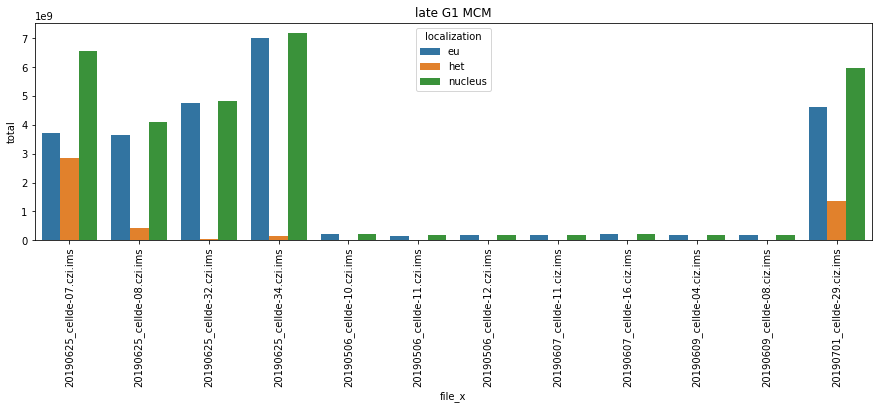

In [81]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="total", hue="localization", data=dataMerged.loc[dataMerged.category=='late G1'])
plt.xticks(rotation='vertical')
plt.title('late G1 MCM')

Text(0.5, 1.0, 'G2 MCM')

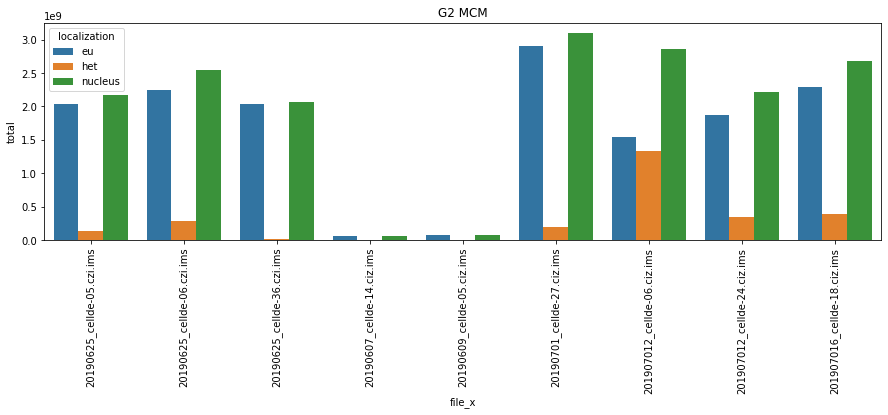

In [78]:
plt.figure(figsize=(15,4))
sns.barplot(x="file_x", y="total", hue="localization", data=dataMerged.loc[dataMerged.category=='G2'])
plt.xticks(rotation='vertical')
plt.title('G2 MCM')